F:\Uninstall\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
F:\Uninstall\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, '股票收盘价的偏自相关图')

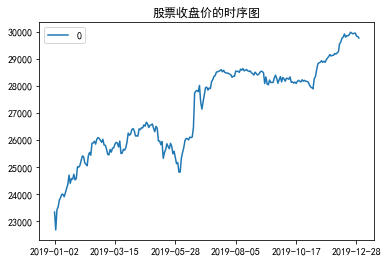

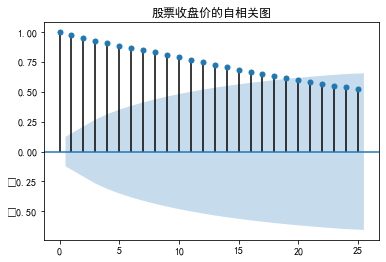

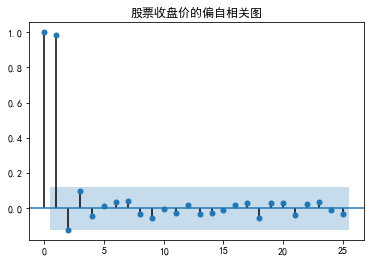

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pymysql
plt.rcParams['font.sans-serif']=['SimHei']

#连接Hadoop数据库
v1 = []
v2 = []
v3 = []
conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT trade_date,close FROM stocks WHERE year(trade_date)=2019 order by trade_date asc"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])
data=pd.DataFrame(v2,v1)

data.plot()
plt.title("股票收盘价的时序图")

# 绘制自相关图
plot_acf(data).show()
plt.title("股票收盘价的自相关图")

# 绘制偏自相关图
plot_pacf(data).show()
plt.title("股票收盘价的偏自相关图")